In [40]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

### Skip List

In [2]:
from pyskiplist import SkipList

In [3]:
sl = SkipList()

In [4]:
import time

### Insertion

In [5]:
b = 0
insert_sl_timesave = []
insert_sl_timesave_x = []
for k in range(10,31):
    c = 2**k
    t1 = time.time()
    for n in range(1,(2**k)+1):
        a = np.random.randint(1,(2**30)+1)
        b = b+1
        sl.insert(a)
    t2 = time.time()
    duringtime=round(t2-t1, 6)
    insert_sl_timesave.append(duringtime)
    insert_sl_timesave_x.append(c)
    print(duringtime)
insert_sl_timesave = np.array(insert_sl_timesave)
insert_sl_timesave_x = np.array(insert_sl_timesave_x)

0.030916
0.050865
0.130648
0.206451
0.442103
0.991966
1.763822
3.686757
8.171927
24.76231
57.370618
128.032002
211.295745


KeyboardInterrupt: 

In [6]:
insert_sl_timesave = np.array(insert_sl_timesave)

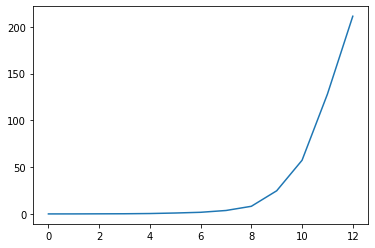

In [7]:
plt.plot(insert_sl_timesave)

In [8]:
r_insert_sl_timesave = []
for i in range(len(insert_sl_timesave)-1):
    r=insert_sl_timesave[i+1]/insert_sl_timesave[i]
    r_insert_sl_timesave.append(r)
r = np.mean(r_insert_sl_timesave)

In [9]:
len(insert_sl_timesave)

13

In [10]:
for j in range(0,8):
    aa = insert_sl_timesave[-1]*r
    insert_sl_timesave = np.insert(insert_sl_timesave,len(insert_sl_timesave),aa,0)

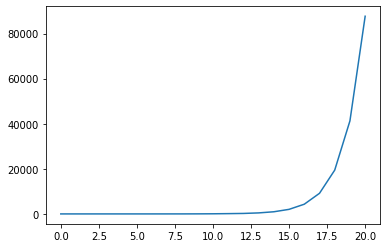

In [22]:
plt.plot(insert_sl_timesave)

### Splay Tree

In [13]:
__author__ = 'bozeng'

## the fundamental operations are rotateleft and rotateright.

# it is always true for maybe both splaying tree and AVL tree. understand the recursive logic chain behind those operations.

class TreeNode:
    def __init__(self,key,value):
        self.key=key
        self.value=value
        self.left=None
        self.right=None


class SplayTree:
    def __init__(self):

        self.root=None

    def insert(self,key,value):

        if not self.root:
            self.root=TreeNode(key,value)
            return

        self.root=self.splaying(self.root,key)

        if key==self.root.key:
            self.root.value=value

        elif key<self.root.key:     ## so key's (supposed) parent was the current root. and it can very well have left and right subtrees.
            node=TreeNode(key,value)
            node.right=self.root    ## due to the properties of BST, those subtrees must be smaller than key (returned root must be the closest).
            node.left=self.root.left
            self.root.left=None
            self.root=node

        else:
            node=TreeNode(key,value)
            node.left=self.root
            node.right=self.root.right ## due to the properties of BST, those subtrees must be greater than key.
            self.root.right=None
            self.root=node


    def find(self,key):

        self.root=self.splaying(self.root,key)

        if self.root.key==key:
            return self.root.value

        return None


    def __contains__(self,key):

        return self.find(key)!=None



    def remove(self,key):

        if not self.root:
            print("empty tree")
            return

        self.root=self.splaying(self.root,key)

        if self.root.key!=key:
            return

        else:  # then we should delete the root

            # the traditional BST deletion is to swap with its inorder predecessor and delete recursively.

            if self.root.left==None:
                self.root=self.root.right

            else: # since now, every thing in the left subtree is smaller than key, everything right subtree larger.
                righttree=self.root.right
                # splaying up the largest element (closest to key) in the left subtree
                self.root=self.splaying(self.root.left,key)  # its right must be empty
                self.root.right=righttree

    # the purpose of splaying is to recursively:
    # move the node with key to root (of the subtree previously rooted at node). or, move the node before key
    # if key is not found to root of such.
    def splaying(self,node,key):

        if not node:
            return None

        if key==node.key:
            return node

        if key<node.key:
            if node.left==None:
                return node

            if key<node.left.key:
                node.left.left=self.splaying(node.left.left,key) # this is a grand parent situation now
                node=self.rotateRight(node)

            elif key>node.left.key:
                node.left.right=self.splaying(node.left.right,key)
                if node.left.right:
                    node.left=self.rotateLeft(node.left)

            if node.left:
                return self.rotateRight(node)

            return node


        elif key>node.key:
            if node.right==None:
                return node

            if key<node.right.key:
                node.right.left=self.splaying(node.right.left,key)
                if node.right.left:
                    node.right=self.rotateRight(node.right)

            elif key>node.right.key:
                node.right.right=self.splaying(node.right.right,key)
                node=self.rotateLeft(node)

            if node.right:
                return self.rotateLeft(node)

            return node


    def rotateLeft(self,node):  ## only deal with parent-child rotation
        if not node:
            return None

        child=node.right

        if not child:
            return node

        node.right=child.left
        child.left=node

        return child


    def rotateRight(self,node): ## only deal with parent-child rotation

        if not node:
            return None

        child=node.left

        if not child:
            return node

        node.left=child.right

        child.right=node

        return child

    def keys(self):

        def recursivePreorder(node):

            if not node:
                return

            yield node.key
            yield from recursivePreorder(node.left)
            yield from recursivePreorder(node.right)

        return recursivePreorder(self.root)


    def values(self):

        def recursivePreorder(node):
            if not node:
                return

            yield node.value

            yield from recursivePreorder(node.left)
            yield from recursivePreorder(node.right)

        return recursivePreorder(self.root)

### Insertion

In [15]:
st = SplayTree()
insert_st_timesave = []
insert_st_timesave_x = []
for k in range(10,31):
    c = 2**k
    t1 = time.time()
    for n in range(1,(2**k)+1):
        a = np.random.randint(1,(2**30)+1)
        st.insert(a,a)
    t2 = time.time()
    duringtime=round(t2-t1, 6)
    insert_st_timesave.append(duringtime)
    insert_st_timesave_x.append(c)
    print(duringtime)
insert_st_timesave = np.array(insert_st_timesave)
insert_st_timesave_x = np.array(insert_st_timesave_x)

0.023942
0.038889
0.052867
0.106721
0.283046
0.618214
1.337094
3.003403
6.633304
14.462441
50.99156
94.629036
217.973584


KeyboardInterrupt: 

In [16]:
insert_st_timesave = np.array(insert_st_timesave)

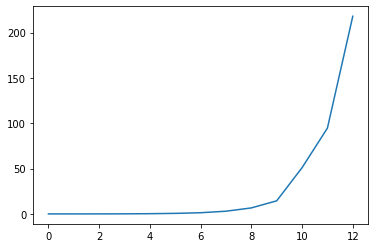

In [17]:
plt.plot(insert_st_timesave)

In [18]:
r_insert_st_timesave = []
for i in range(len(insert_st_timesave)-1):
    r=insert_st_timesave[i+1]/insert_st_timesave[i]
    r_insert_st_timesave.append(r)
r = np.mean(r_insert_st_timesave)

In [19]:
len(insert_st_timesave)

13

In [20]:
for j in range(0,8):
    aa = insert_st_timesave[-1]*r
    insert_st_timesave = np.insert(insert_st_timesave,len(insert_st_timesave),aa,0)

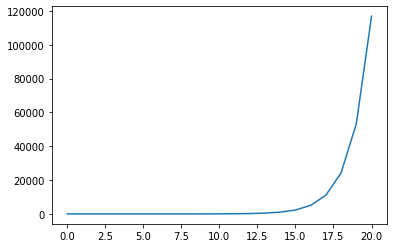

In [21]:
plt.plot(insert_st_timesave)

### Sorted Array

In [94]:
def insertsortedarr(arr,el):
    for j in arr:
        if arr[j]<el:
            arr = np.insert(arr,arr[j],el,0)

### Insertion Array

In [54]:
arr = np.array([])
insert_arr_timesave = []
insert_arr_timesave_x = []
for k in range(10,31):
    c = 2**k
    t1 = time.time()
    for n in range(1,(2**k)+1):
        a = np.random.randint(1,(2**30)+1)
        insertsortedarr(arr,a)
    t2 = time.time()
    duringtime=round(t2-t1, 6)
    insert_arr_timesave.append(duringtime)
    insert_arr_timesave_x.append(c)
    print(duringtime)
insert_arr_timesave = np.array(insert_arr_timesave)
insert_arr_timesave_x = np.array(insert_arr_timesave_x)

0.00299
0.005987
0.011495
0.021487
0.037892
0.058841
0.115691
0.24535
0.484851
0.973682
1.838782
4.263771
8.421448
14.605413
29.063144
62.59251


KeyboardInterrupt: 

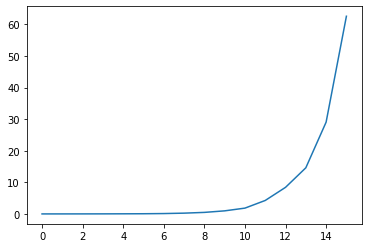

In [55]:
plt.plot(insert_arr_timesave)

In [56]:
r_insert_arr_timesave = []
for i in range(len(insert_arr_timesave)-1):
    r=insert_arr_timesave[i+1]/insert_arr_timesave[i]
    r_insert_arr_timesave.append(r)
r = np.mean(r_insert_arr_timesave)

In [57]:
len(insert_arr_timesave)

16

In [58]:
for j in range(0,5):
    aa = insert_arr_timesave[-1]
    insert_arr_timesave = np.insert(insert_arr_timesave,len(insert_arr_timesave),aa,0)

In [59]:
len(insert_arr_timesave)

21

In [60]:
x=[]
for i in range(10,31):
    x.append(i)
x = np.array(x)

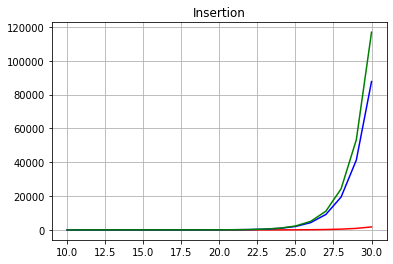

In [66]:
plt.title('Insertion')
plt.plot(x, insert_arr_timesave, color = 'red', label = 'Sorted Array')
plt.plot(x, insert_sl_timesave, color = 'blue', label = 'Skip List')
plt.plot(x, insert_st_timesave, color = 'green', label = 'Splay Tree')
plt.grid(True)

### Hash Table

In [118]:
ht = {}
insert_ht_timesave = []
insert_ht_timesave_x = []
for k in range(10,31):
    c = 2**k
    t1 = time.time()
    for n in range(1,(2**k)+1):
        a = np.random.randint(1,(2**30)+1)
        ht.setdefault(a,a)
    t2 = time.time()
    duringtime=round(t2-t1, 6)
    insert_ht_timesave.append(duringtime)
    insert_ht_timesave_x.append(c)
    print(duringtime)
insert_ht_timesave = np.array(insert_ht_timesave)
insert_ht_timesave_x = np.array(insert_ht_timesave_x)

0.004985
0.010969
0.009973
0.013963
0.031951
0.056844
0.080819
0.242404
0.39479
1.108075
1.612765
3.097688
6.705469


KeyboardInterrupt: 

In [119]:
r_insert_ht_timesave = []
for i in range(len(insert_ht_timesave)-1):
    r=insert_ht_timesave[i+1]/insert_ht_timesave[i]
    r_insert_ht_timesave.append(r)
r = np.mean(r_insert_ht_timesave)

In [120]:
len(insert_ht_timesave)

13

In [121]:
for j in range(0,8):
    aa = insert_ht_timesave[-1]*r
    insert_ht_timesave = np.insert(insert_ht_timesave,len(insert_ht_timesave),aa,0)

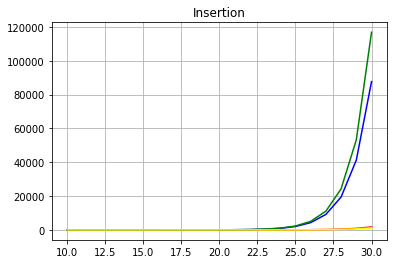

In [122]:
plt.title('Insertion')
plt.plot(x, insert_arr_timesave, color = 'red', label = 'Sorted Array')
plt.plot(x, insert_sl_timesave, color = 'blue', label = 'Skip List')
plt.plot(x, insert_st_timesave, color = 'green', label = 'Splay Tree')
plt.plot(x, insert_ht_timesave, color = 'yellow', label = 'Hash Table')
plt.grid(True)

### Search

### Skip List

In [85]:
b = 0
search_sl_timesave = []
search_sl_timesave_x = []
for k in range(10,31):
    c = 2**k
    t1 = time.time()
    for n in range(1,(2**k)+1):
        a = np.random.randint(1,(2**30)+1)
        sl.search(a)
    t2 = time.time()
    duringtime=round(t2-t1, 6)
    search_sl_timesave.append(duringtime)
    search_sl_timesave_x.append(c)
    print(duringtime)
search_sl_timesave = np.array(search_sl_timesave)
search_sl_timesave_x = np.array(search_sl_timesave_x)

0.046875
0.066858
0.132613
0.260595
0.403191
0.799314
1.535739
3.085051
6.161177
15.364968
31.9854
51.751915


KeyboardInterrupt: 

In [87]:
search_sl_timesave = np.array(search_sl_timesave)

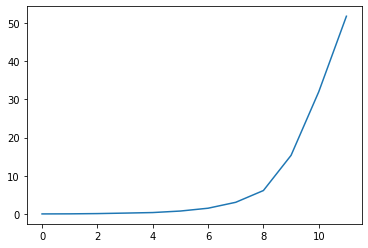

In [88]:
plt.plot(search_sl_timesave)

In [89]:
r_search_sl_timesave = []
for i in range(len(search_sl_timesave)-1):
    r=search_sl_timesave[i+1]/search_sl_timesave[i]
    r_search_sl_timesave.append(r)
r = np.mean(r_search_sl_timesave)

In [91]:
len(search_sl_timesave)

12

In [92]:
for j in range(0,9):
    aa = search_sl_timesave[-1]*r
    search_sl_timesave = np.insert(search_sl_timesave,len(search_sl_timesave),aa,0)

In [93]:
len(search_sl_timesave)

21

### Splay Tree

In [97]:
b = 0
search_st_timesave = []
search_st_timesave_x = []
for k in range(10,31):
    c = 2**k
    t1 = time.time()
    for n in range(1,(2**k)+1):
        a = np.random.randint(1,(2**30)+1)
        st.find(a)
    t2 = time.time()
    duringtime=round(t2-t1, 6)
    search_st_timesave.append(duringtime)
    search_st_timesave_x.append(c)
    print(duringtime)
search_st_timesave = np.array(search_st_timesave)
search_st_timesave_x = np.array(search_st_timesave_x)

0.331228
0.423571
0.869896
1.216085
1.430334
2.311785
3.087003
5.206361
10.64799
20.297778
33.925059
66.293954


KeyboardInterrupt: 

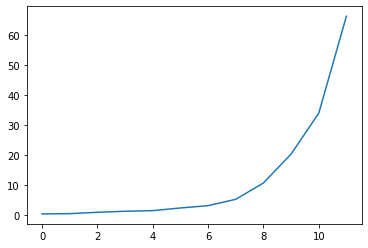

In [98]:
search_st_timesave = np.array(search_st_timesave)
plt.plot(search_st_timesave)

In [99]:
r_search_st_timesave = []
for i in range(len(search_st_timesave)-1):
    r=search_st_timesave[i+1]/search_st_timesave[i]
    r_search_st_timesave.append(r)
r = np.mean(r_search_st_timesave)

In [100]:
len(search_st_timesave)

12

In [101]:
for j in range(0,9):
    aa = search_st_timesave[-1]*r
    search_st_timesave = np.insert(search_st_timesave,len(search_st_timesave),aa,0)

In [102]:
len(search_st_timesave)

21

### Sorted Array

In [103]:
def searchsortedarr(arr,a):
    for j in arr:
        if a == j:
            return True
        else:
            return False

In [104]:
search_arr_timesave = []
search_arr_timesave_x = []
for k in range(10,31):
    c = 2**k
    t1 = time.time()
    for n in range(1,(2**k)+1):
        a = np.random.randint(1,(2**30)+1)
        searchsortedarr(arr,a)
    t2 = time.time()
    duringtime=round(t2-t1, 6)
    search_arr_timesave.append(duringtime)
    search_arr_timesave_x.append(c)
    print(duringtime)
search_arr_timesave = np.array(search_arr_timesave)
search_arr_timesave_x = np.array(search_arr_timesave_x)

0.004983
0.009976
0.018978
0.036901
0.078299
0.094777
0.139626
0.272241
0.721459
1.268404
2.586954
5.183902
9.564359
19.631858
37.217836


KeyboardInterrupt: 

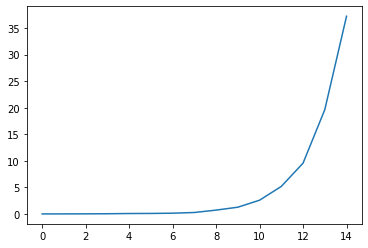

In [105]:
search_arr_timesave = np.array(search_arr_timesave)
plt.plot(search_arr_timesave)

In [106]:
r_search_arr_timesave = []
for i in range(len(search_arr_timesave)-1):
    r=search_arr_timesave[i+1]/search_arr_timesave[i]
    r_search_arr_timesave.append(r)
r = np.mean(r_search_arr_timesave)

In [107]:
len(search_arr_timesave)

15

In [108]:
for j in range(0,6):
    aa = search_arr_timesave[-1]*r
    search_arr_timesave = np.insert(search_arr_timesave,len(search_arr_timesave),aa,0)

In [109]:
len(search_arr_timesave)

21

### Hash Table

In [123]:
def searchht(ht,a):
    for j in ht.keys():
        if a == j:
            return True
        else:
            return False

In [124]:
search_ht_timesave = []
search_ht_timesave_x = []
for k in range(10,31):
    c = 2**k
    t1 = time.time()
    for n in range(1,(2**k)+1):
        a = str(np.random.randint(1,(2**30)+1))
        searchht(ht,a)
    t2 = time.time()
    duringtime=round(t2-t1, 6)
    search_ht_timesave.append(duringtime)
    search_ht_timesave_x.append(c)
    print(duringtime)
search_ht_timesave = np.array(search_ht_timesave)
search_ht_timesave_x = np.array(search_ht_timesave_x)

0.005951
0.005012
0.007978
0.017952
0.034907
0.053888
0.089544
0.271232
0.384047
0.872324
3.618786
3.774474
8.276547
15.393556
29.430696


KeyboardInterrupt: 

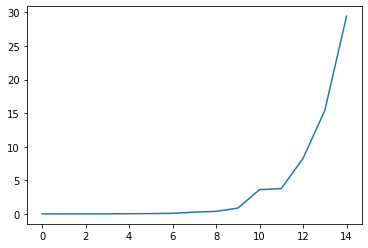

In [125]:
search_ht_timesave = np.array(search_ht_timesave)
plt.plot(search_ht_timesave)

In [126]:
r_search_ht_timesave = []
for i in range(len(search_ht_timesave)-1):
    r=search_ht_timesave[i+1]/search_ht_timesave[i]
    r_search_ht_timesave.append(r)
r = np.mean(r_search_ht_timesave)

In [127]:
len(search_ht_timesave)

15

In [128]:
for j in range(0,6):
    aa = search_ht_timesave[-1]*r
    search_ht_timesave = np.insert(search_ht_timesave,len(search_ht_timesave),aa,0)

In [129]:
len(search_ht_timesave)

21

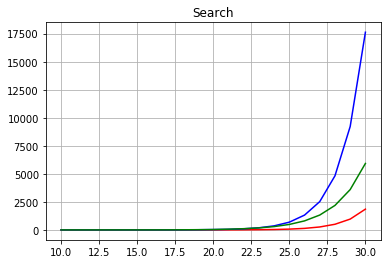

In [130]:
plt.title('Search')
plt.plot(x, search_arr_timesave, color = 'red', label = 'Sorted Array')
plt.plot(x, search_sl_timesave, color = 'blue', label = 'Skip List')
plt.plot(x, search_st_timesave, color = 'green', label = 'Splay Tree')
plt.grid(True)

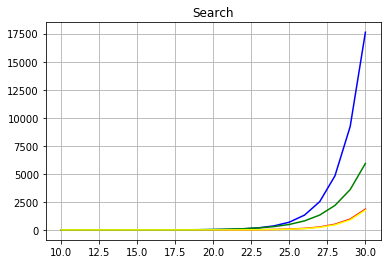

In [131]:
plt.title('Search')
plt.plot(x, search_arr_timesave, color = 'red', label = 'Sorted Array')
plt.plot(x, search_sl_timesave, color = 'blue', label = 'Skip List')
plt.plot(x, search_st_timesave, color = 'green', label = 'Splay Tree')
plt.plot(x, search_ht_timesave, color = 'yellow', label = 'Hash Table')
plt.grid(True)